In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:

"""In the ml, we cannot work with many datasets as it will get difficult.
We need to club all datasets into 1 dataset and work in it."""

# NOTE: whenever there is no. before \ , then we need to keep \\ in the file path to not get errors.

t = pd.read_csv("train_walmart.csv")   
s = pd.read_csv("stores.csv")
f = pd.read_csv("features.csv")

In [4]:
"""Now, let's identify the NaN values in each datasets"""

print(t.isnull().sum())
print()
print(s.isnull().sum())
print()
print(f.isnull().sum())
print()
print(f.shape)

# lets, see how much percent of data is missing in each columns.
print()
print(f["MarkDown1"].isnull().sum()/f.shape[0]*100)
print(f["MarkDown2"].isnull().sum()/f.shape[0]*100)
print(f["MarkDown3"].isnull().sum()/f.shape[0]*100)
print(f["MarkDown4"].isnull().sum()/f.shape[0]*100)
print(f["MarkDown5"].isnull().sum()/f.shape[0]*100)
print(f["CPI"].isnull().sum()/f.shape[0]*100)
print(f["Unemployment"].isnull().sum()/f.shape[0]*100)

# more than 50% lost data in markdowns.. but CPI and Unemployment has very less NaN 

Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
dtype: int64

Store    0
Type     0
Size     0
dtype: int64

Store              0
Date               0
Temperature        0
Fuel_Price         0
MarkDown1       4158
MarkDown2       5269
MarkDown3       4577
MarkDown4       4726
MarkDown5       4140
CPI              585
Unemployment     585
IsHoliday          0
dtype: int64

(8190, 12)

50.76923076923077
64.33455433455434
55.885225885225886
57.7045177045177
50.54945054945055
7.142857142857142
7.142857142857142


In [5]:
"""So, lets forwardfill CPI and Unemloyment and drop whole MarkDowns.. column """

f.drop(["MarkDown1","MarkDown2","MarkDown3","MarkDown4","MarkDown5"],axis=1,inplace=True)

f["CPI"].fillna(method="ffill",inplace=True)
f["Unemployment"].fillna(method="ffill",inplace=True)

#[OR]

# f.fill(method="ffill",inplace=True)       # as other than CPI and Unemployment remaining all the columns has no NaN values.

print(f.isnull().sum())

Store           0
Date            0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
IsHoliday       0
dtype: int64


In [6]:
"""Now, we need to merge the datasets into 1 dataset by using joints.
1) Inner join --> pd.merge(a,b,on=["key_taken/common_Column"],how="inner")
2) left join --> pd.merge(a,b,on=["key_taken/common_Column"],how="left")
3) right join --> pd.merge(a,b,on=["key_taken/common_Column"],how="right")
4) outer join/full join --> pd.merge(a,b,on=["key_taken/common_Column"],how="outer")

Here, merge() cann be used as function (pd.merge(xxx)) or method(x.merge(xxx)) as well
eg: t.merge(s,how="inner",on=["Store"])

on= --> common_column taken as index/reference

**NOTE: Using of .merge() method is recommended..**"""

a = pd.merge(t,s,on="Store",how="inner")
print(a.shape)            # gives shape of dataset which helps us to know any dropped rows..

print(a.columns)          # **tells us the common columns of dataset "a" and "f" which can be used as common columns in "on=" -- > 
                          # helps in not to create duplicate columns in the dataset..**

a = a.merge(f,on=["Store","IsHoliday","Date"],how="inner")

# info of the each column of new dataframe
print(a.columns)
print(a.info())
print(a.describe())

(421570, 7)
Index(['Store', 'Dept', 'Date', 'Weekly_Sales', 'IsHoliday', 'Type', 'Size'], dtype='object')
Index(['Store', 'Dept', 'Date', 'Weekly_Sales', 'IsHoliday', 'Type', 'Size',
       'Temperature', 'Fuel_Price', 'CPI', 'Unemployment'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
 5   Type          421570 non-null  object 
 6   Size          421570 non-null  int64  
 7   Temperature   421570 non-null  float64
 8   Fuel_Price    421570 non-null  float64
 9   CPI           421570 non-null  float64
 10  Unemployment  421570 non-null  float64
dtypes: bool(1), float64(5), int64(3), object(2)
mem

In [8]:
"""This new Dataset/DataFrame does not has NaN values as we already filtered it before indivisually..
Q) covert date column into datetime and create new week and year column"""

a["Date"] = pd.to_datetime(a["Date"],errors="coerce")    # Here, we did not use "format=" because it is already in good format. And we need not necessary use "errors=" because there is not other signs in the datetime.

# **In the previous Project, we used DatetimeIndex to find month. And that method is used after converting "datetime" format --> "DatetimeIndex" format only
# and only month, weekday, etc.. will be get. To get year,week and other useful things, we can directly use the "Datetime" format and use like in the below method..**

# NOTE: below method is recomended..

a["WEEK"] = a.Date.dt.isocalendar().week    # From "dt" datetime module (a["Date"] --> Datetime format) , we oppted isocalendar() fnction and from that we find the week.
a["YEAR"] = a.Date.dt.isocalendar().year    # From "dt" datetime module (a["Date"] --> Datetime format) , we oppted isocalendar() fnction and from that we find the year.

print(a)

        Store  Dept       Date  Weekly_Sales  IsHoliday Type    Size  \
0           1     1 2010-02-05      24924.50      False    A  151315   
1           1     2 2010-02-05      50605.27      False    A  151315   
2           1     3 2010-02-05      13740.12      False    A  151315   
3           1     4 2010-02-05      39954.04      False    A  151315   
4           1     5 2010-02-05      32229.38      False    A  151315   
...       ...   ...        ...           ...        ...  ...     ...   
421565     45    93 2012-10-26       2487.80      False    B  118221   
421566     45    94 2012-10-26       5203.31      False    B  118221   
421567     45    95 2012-10-26      56017.47      False    B  118221   
421568     45    97 2012-10-26       6817.48      False    B  118221   
421569     45    98 2012-10-26       1076.80      False    B  118221   

        Temperature  Fuel_Price         CPI  Unemployment  WEEK  YEAR  
0             42.31       2.572  211.096358         8.106     5

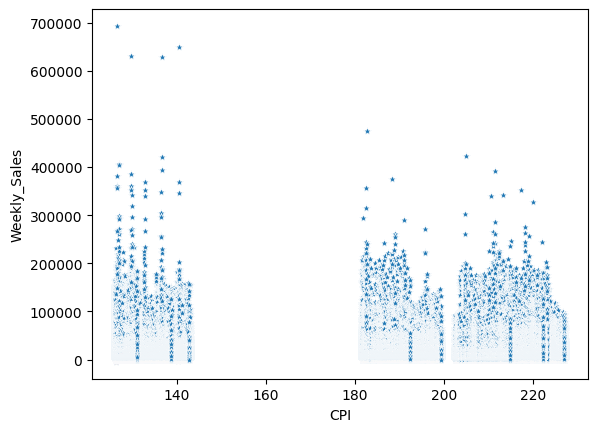

In [12]:
"""Q) create a function that takes feature name as input and create scatter plot of given feature and weekly sales"""

# NOTE: recomended to use seaborn plots as they have built in xlabel, ylabel etc and more convient..

# Test
sns.scatterplot(x=a["CPI"],y=a["Weekly_Sales"],marker="*",data=a)   # sns.scatterplot(x,y,size="size_of_marker",marker="marker_type",data=) . Default marker="*"


def scattplt(x):
    sns.scatterplot(x=x,y=a["Weekly_Sales"],size=0.01,data=a)
    #[or]
#def scattplt(x):    
    #sns.scatterplot(x=a[x],y=a["Weekly_Sales"],size=0.01,date=a)

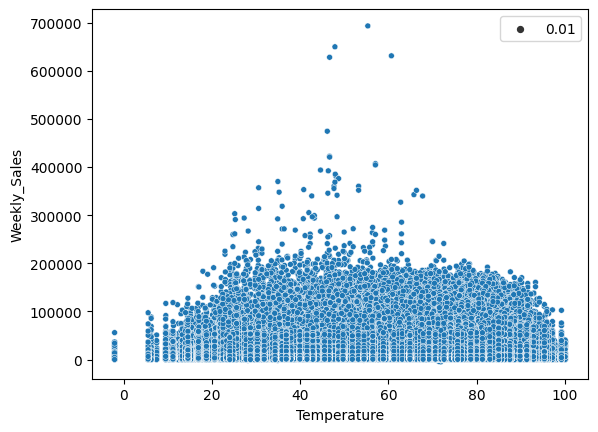

In [14]:
# Result    
scattplt(a["Temperature"])

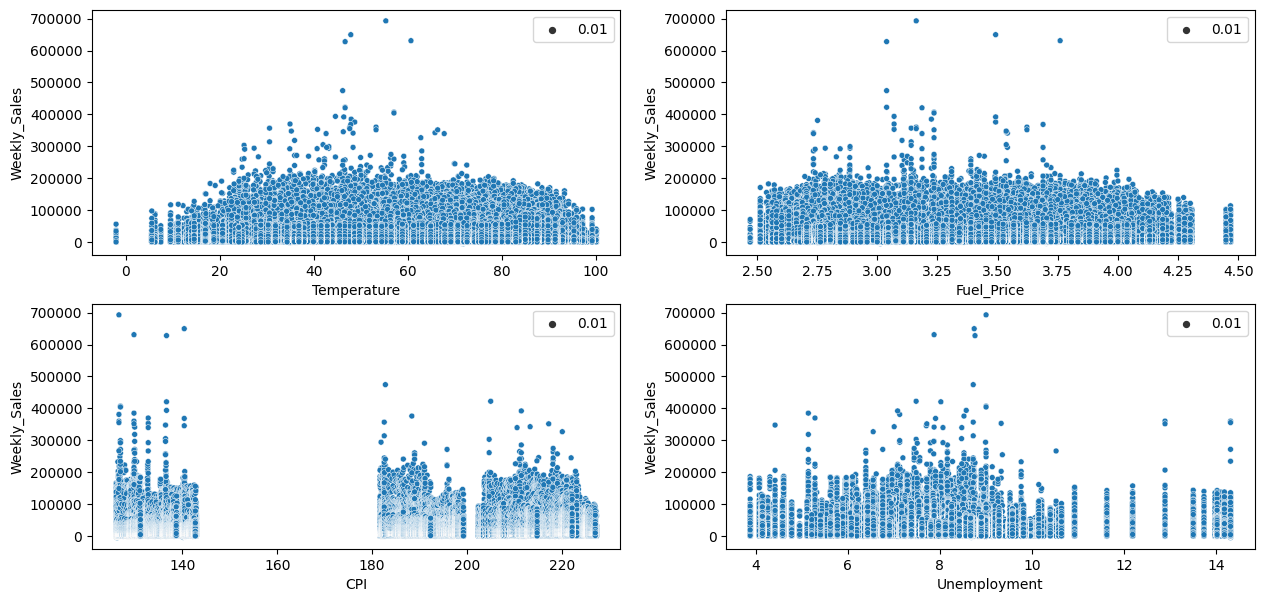

In [18]:
# remodeling
plt.figure(figsize=(15,7))
plt.subplot(2,2,1)
scattplt(a["Temperature"])
plt.subplot(2,2,2)
scattplt(a["Fuel_Price"])
plt.subplot(2,2,3)
scattplt(a["CPI"])
plt.subplot(2,2,4)
scattplt(a["Unemployment"])

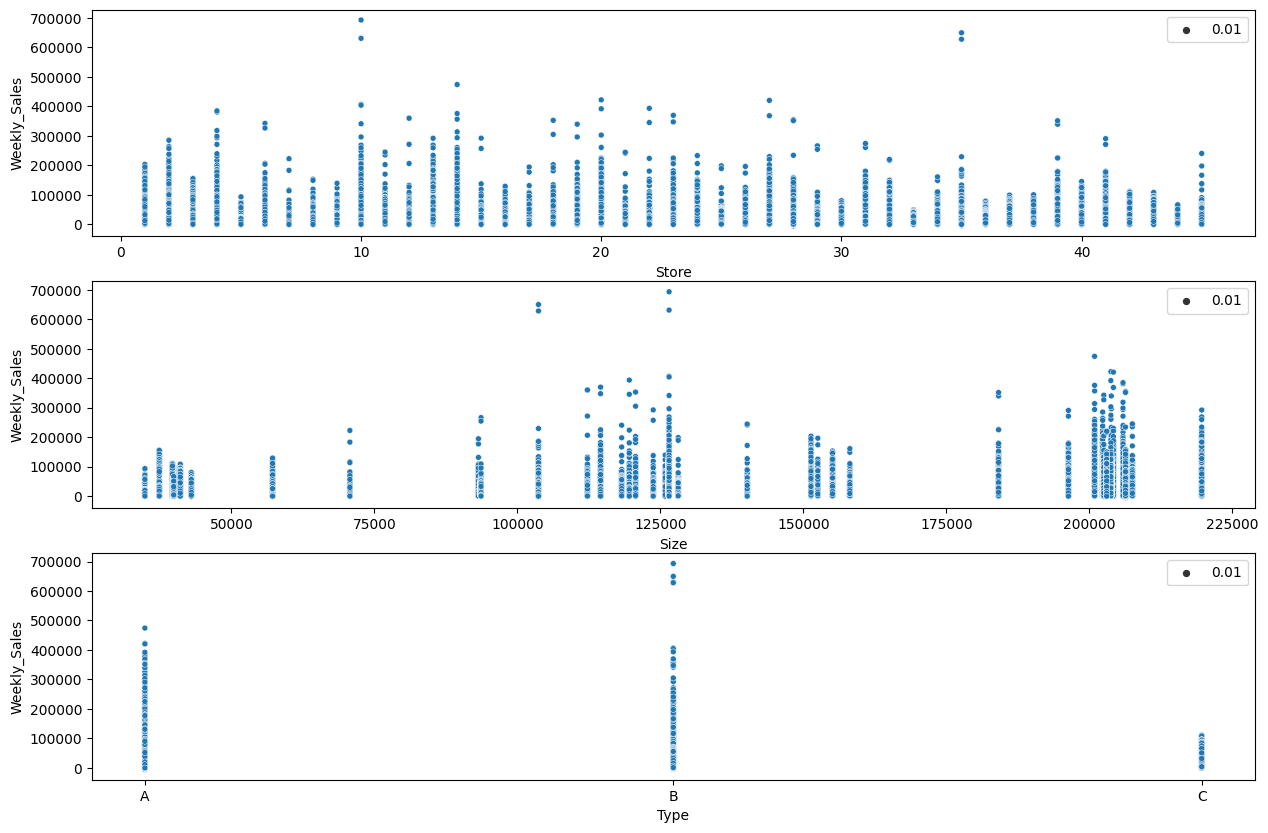

In [19]:
# other value scatter plots
plt.figure(figsize=(15,10))
plt.subplot(3,1,1)
scattplt(a["Store"])
plt.subplot(3,1,2)
scattplt(a["Size"])
plt.subplot(3,1,3)
scattplt(a["Type"])

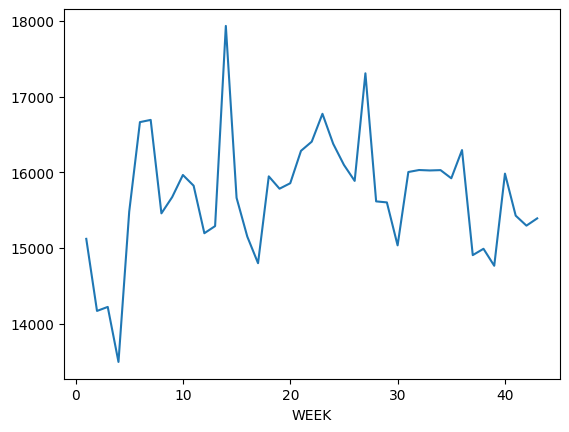

In [20]:
"""Q) create line chart for week_sales vs each year
Q) avg weekly sales for 2012"""

a[a["YEAR"] == 2012].groupby(["WEEK"])["Weekly_Sales"].mean().plot(kind="line")     # filtered data of only 2012 year --> gets groupedby according to each "WEEK"'s weekly_Sales's mean/avg..

# [or] --> can use seaborn as: RECOMMENDED
# sns.lineplot(x=a[a["YEAR"] == 2012].groupby(["WEEK"])["Weekly_Sales"].mean().index,y=a[a["YEAR"] == 2012].groupby(a["WEEK"])["Weekly_Sales"].mean().values,color="red")

# NOTE: Always check and read the plot/function/method Arguments INFO when we get error.

def yearplt(p):
    a[a["YEAR"] == p].groupby(a["WEEK"])["Weekly_Sales"].mean().plot(kind="line")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         421570 non-null  int64         
 1   Dept          421570 non-null  int64         
 2   Date          421570 non-null  datetime64[ns]
 3   Weekly_Sales  421570 non-null  float64       
 4   IsHoliday     421570 non-null  bool          
 5   Type          421570 non-null  object        
 6   Size          421570 non-null  int64         
 7   Temperature   421570 non-null  float64       
 8   Fuel_Price    421570 non-null  float64       
 9   CPI           421570 non-null  float64       
 10  Unemployment  421570 non-null  float64       
 11  WEEK          421570 non-null  UInt32        
 12  YEAR          421570 non-null  UInt32        
dtypes: UInt32(2), bool(1), datetime64[ns](1), float64(5), int64(3), object(1)
memory usage: 36.6+ MB
None
               St

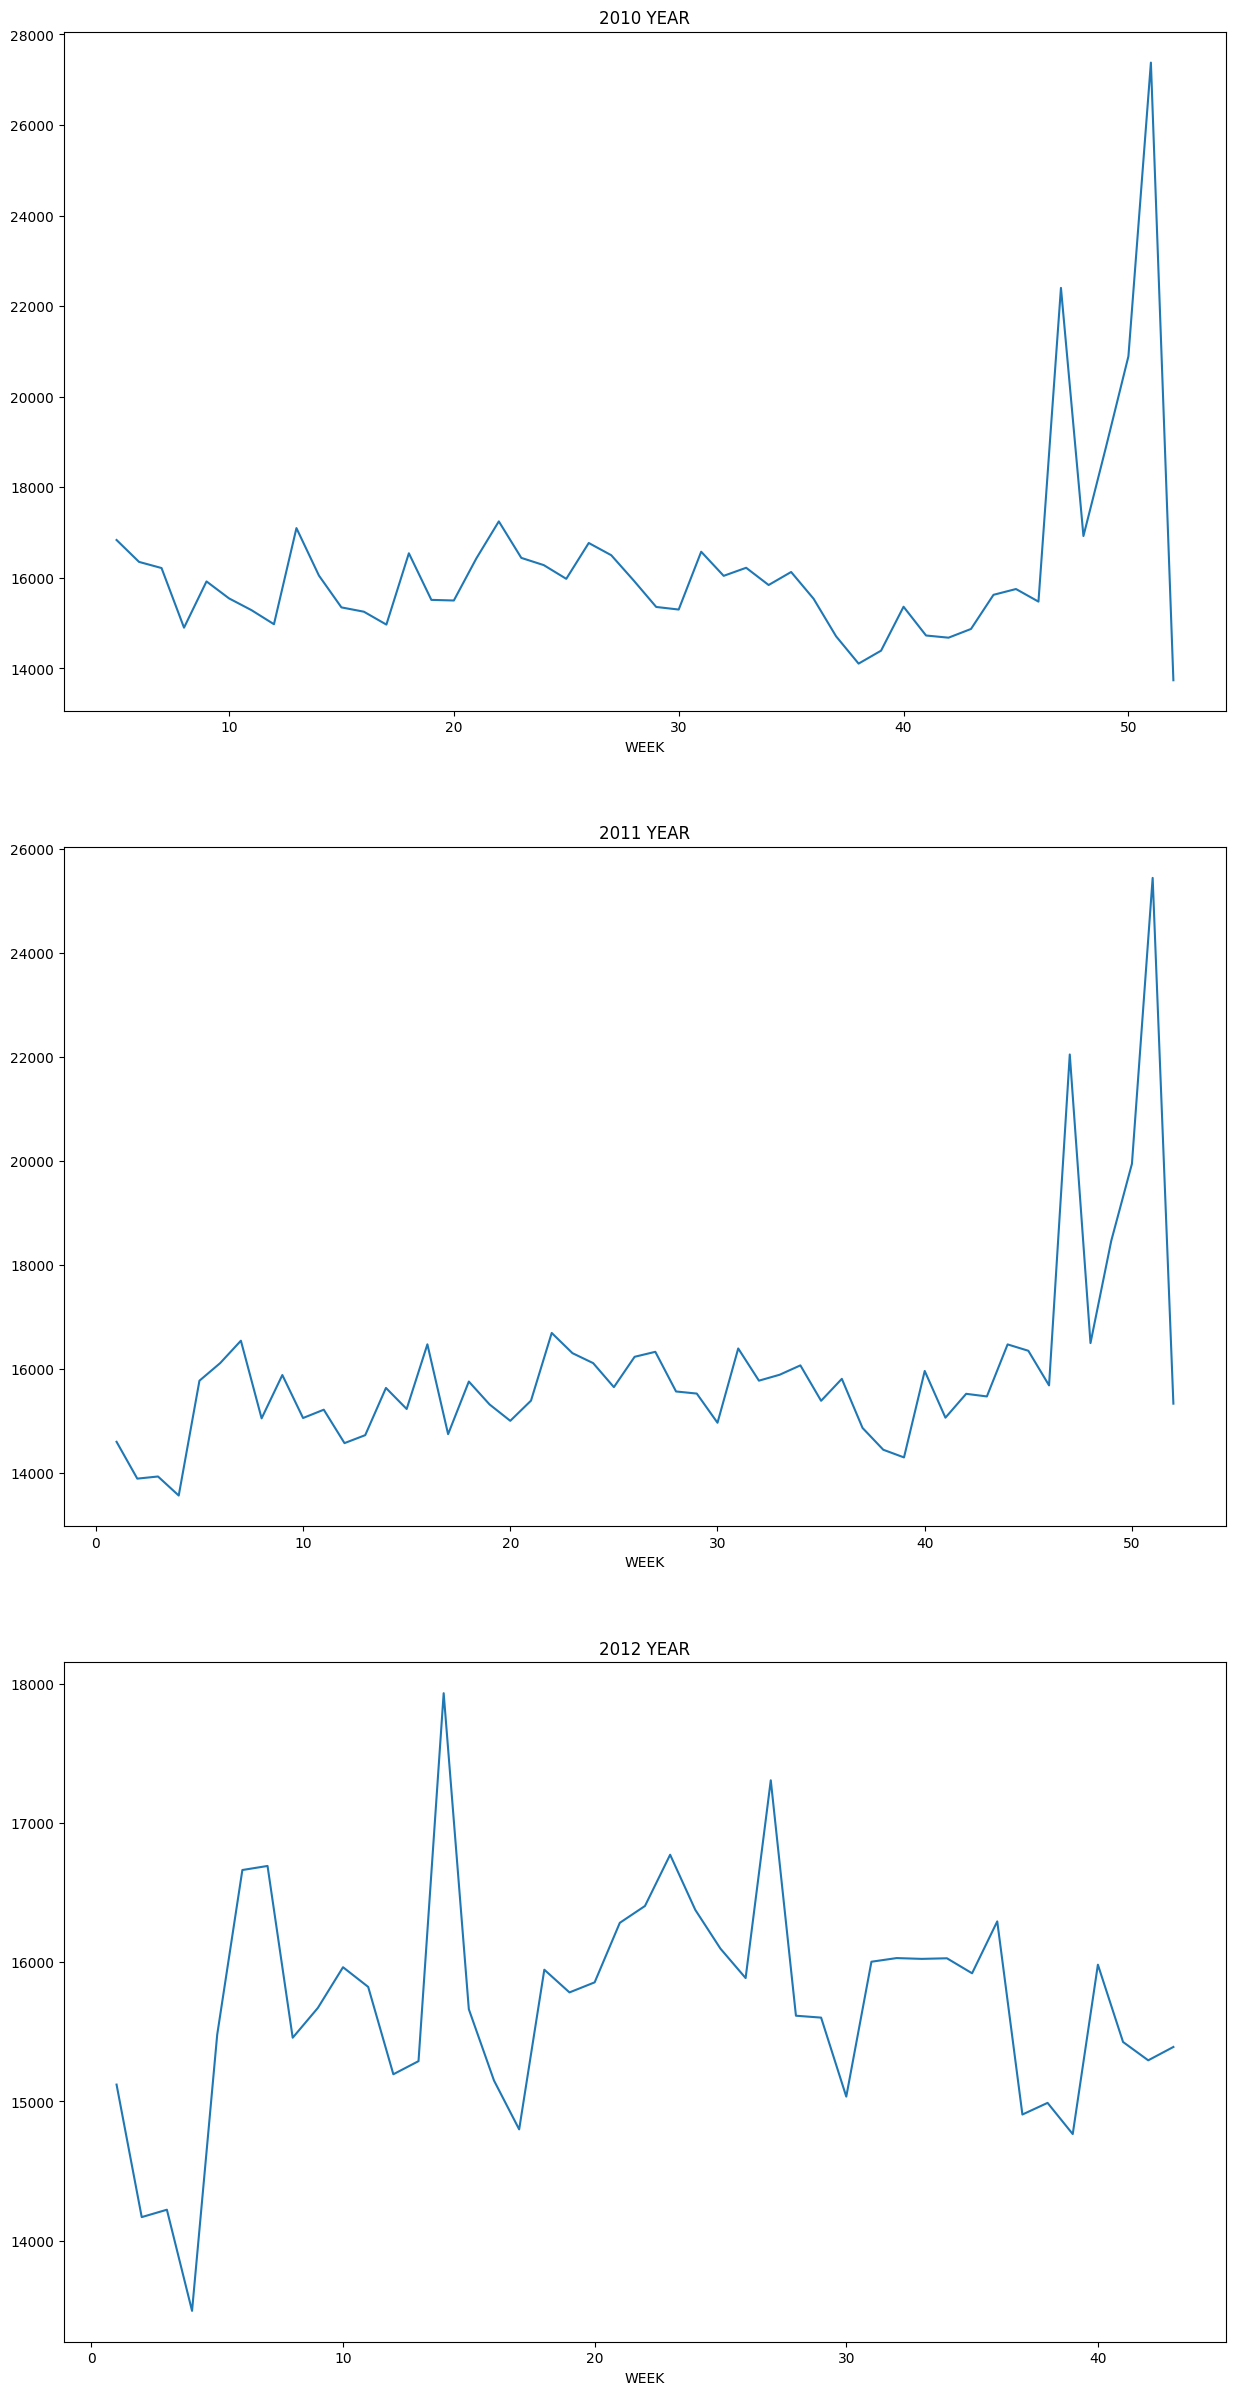

In [21]:
# Expertmenting with the above function yearplt()
plt.figure(figsize=(15,30))    
plt.subplot(3,1,1)
yearplt(2010)
plt.title("2010 YEAR")
plt.subplot(3,1,2)
yearplt(2011)
plt.title("2011 YEAR")
plt.subplot(3,1,3)
yearplt(2012)
plt.title("2012 YEAR")

print(a.info())
print(a.describe())     

In [22]:
# in above eventhough the CPI and Unemployment datatype is UInte32, jupiter takes it and gives us the plot. but vscode cannot do that. so, for safty lets convert it to float.
# In above it gives "WEEK" & "YEAR" as UInt32. lets convert it to "float" daatatype for smooth execution.  --> this solves "sns.lineplot" error above..
a["WEEK"] = a["WEEK"].astype(float)
a["YEAR"] = a["YEAR"].astype(float)

print(a.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         421570 non-null  int64         
 1   Dept          421570 non-null  int64         
 2   Date          421570 non-null  datetime64[ns]
 3   Weekly_Sales  421570 non-null  float64       
 4   IsHoliday     421570 non-null  bool          
 5   Type          421570 non-null  object        
 6   Size          421570 non-null  int64         
 7   Temperature   421570 non-null  float64       
 8   Fuel_Price    421570 non-null  float64       
 9   CPI           421570 non-null  float64       
 10  Unemployment  421570 non-null  float64       
 11  WEEK          421570 non-null  float64       
 12  YEAR          421570 non-null  float64       
dtypes: bool(1), datetime64[ns](1), float64(7), int64(3), object(1)
memory usage: 39.0+ MB
None


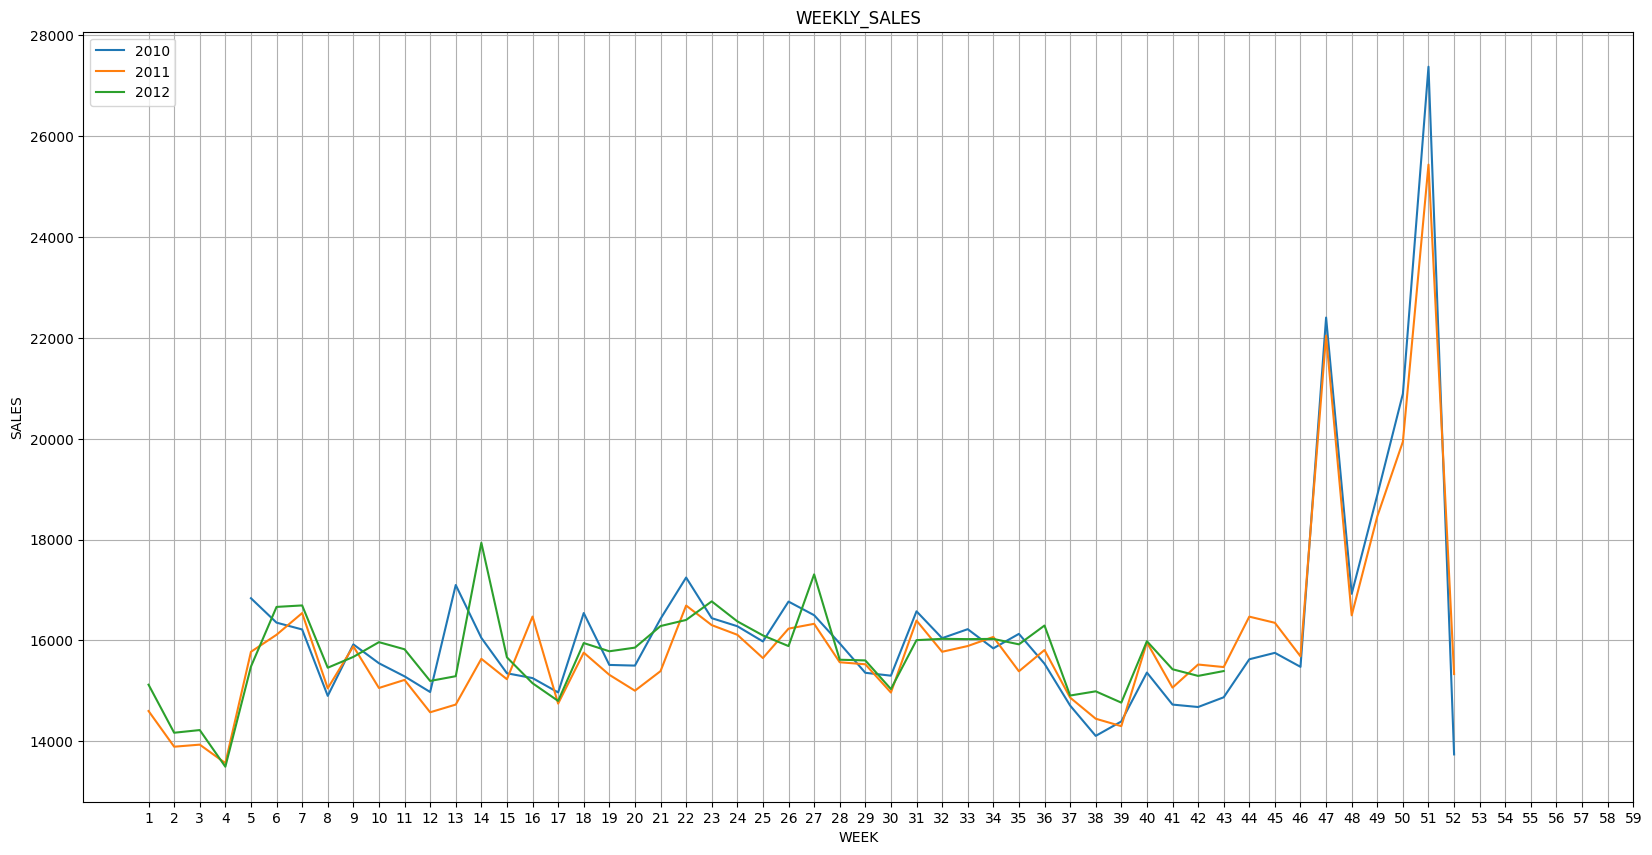

In [23]:
# Now, lets create all lineplots in 1 plot

plt.figure(figsize=(20,10))
yearplt(2010)
yearplt(2011)
yearplt(2012)
plt.title("WEEKLY_SALES")
plt.xlabel("WEEK")
plt.ylabel("SALES")
plt.grid()
plt.xticks(np.arange(1,60))                       # gives the "xticks" values. Can also rotate the "xticks". Here, "xticks" --> "xlabels"/"xcoordinate"
plt.legend([2010,2011,2012],loc="upper left")         # syntax --> plt.legend([order_wise_line_labels],loc="location_of_legend")

# it is seen that everything is same in every year in the plot. As 2012 plot date is lost at the end
# Now, we need to assume that we need to have high stocks as sales are getting high in the end of each year.

C:\Users\ASUS\AppData\Local\Temp\ipykernel_8468\3728439895.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(a["Weekly_Sales"],kde=False,bins=100,color="red")


<Axes: xlabel='Weekly_Sales'>

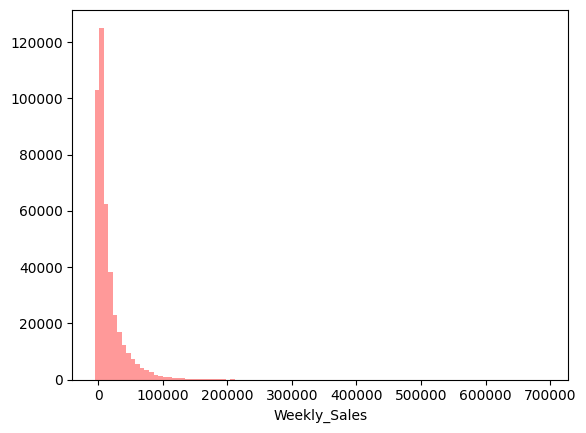

In [24]:
"""Now, lets see the distroibution of the Weekly_Sales"""

sns.distplot(a["Weekly_Sales"],kde=False,bins=100,color="red")

<Axes: xlabel='Dept'>

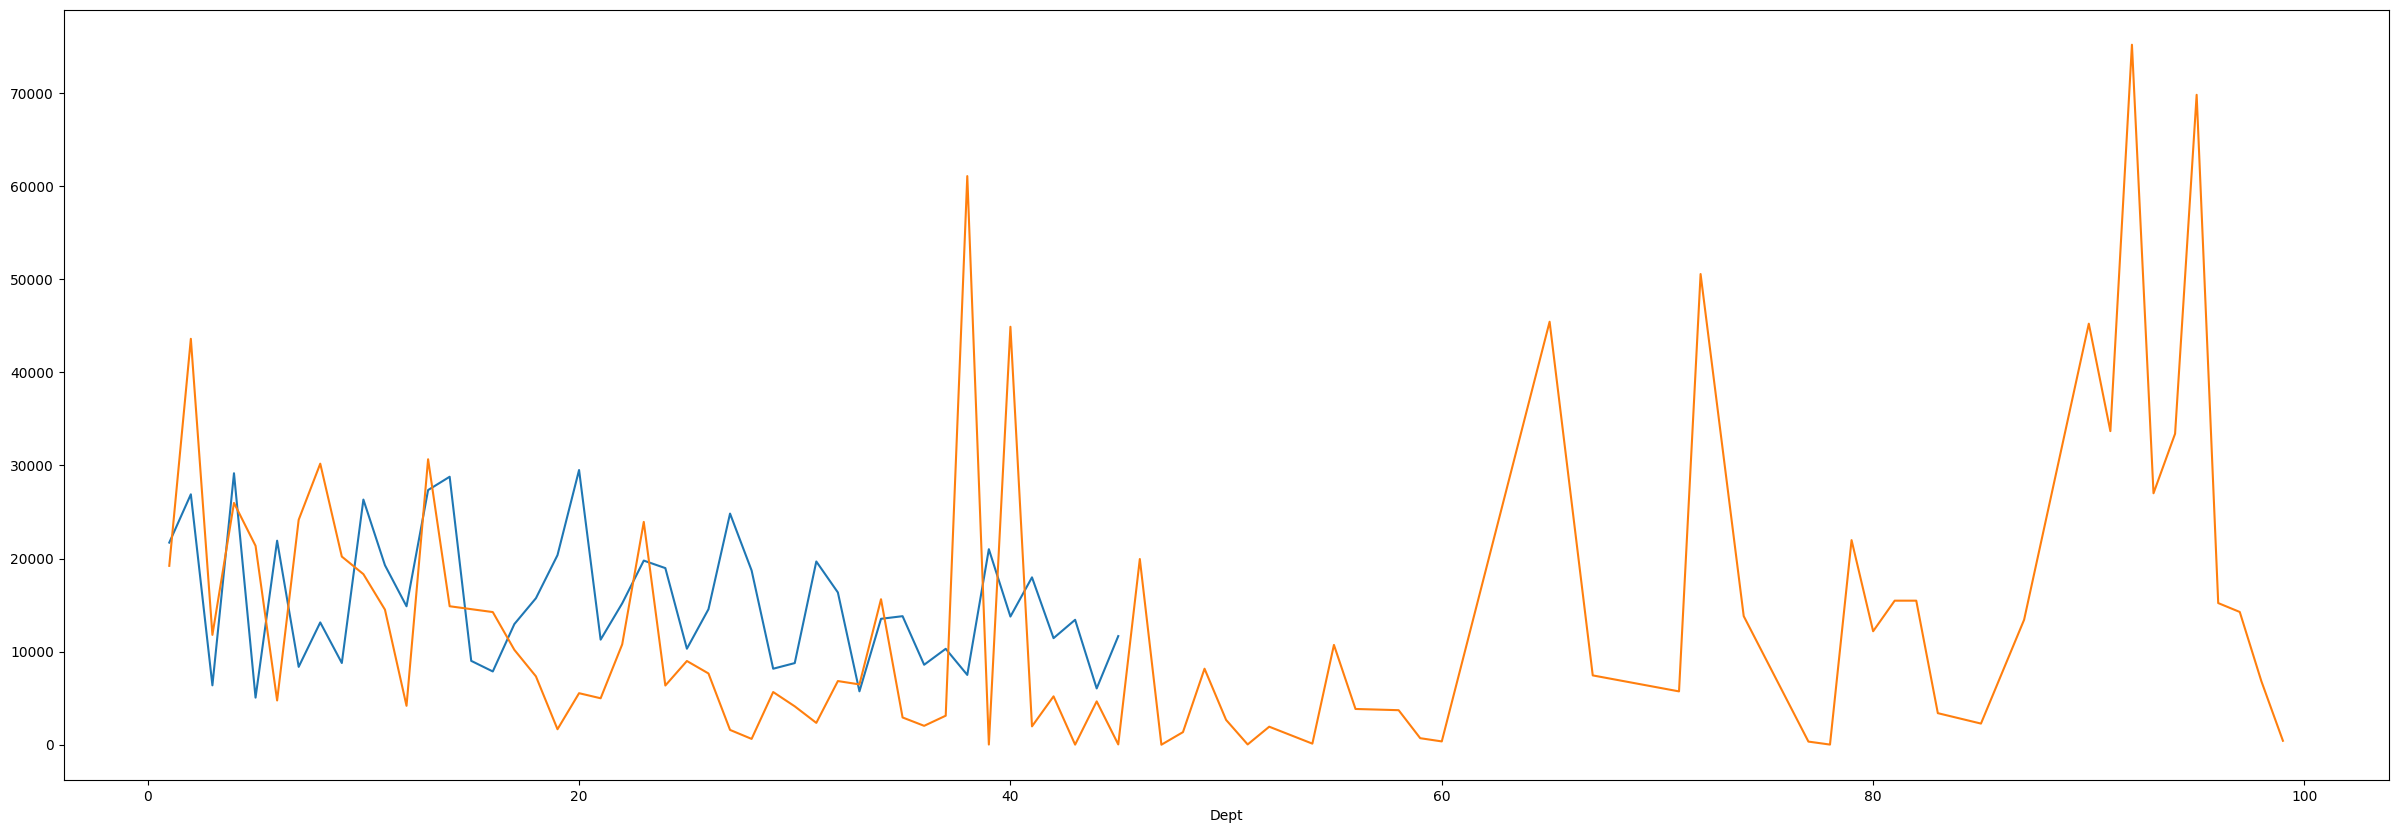

In [25]:
"""Q) plot the stores with highest avg sales
Q) plot the dept with with highest avg sales"""

plt.figure(figsize=(30,10))
a.groupby(["Store"])["Weekly_Sales"].mean().plot(kind="line")
a.groupby(["Dept"])["Weekly_Sales"].mean().plot(kind="line")

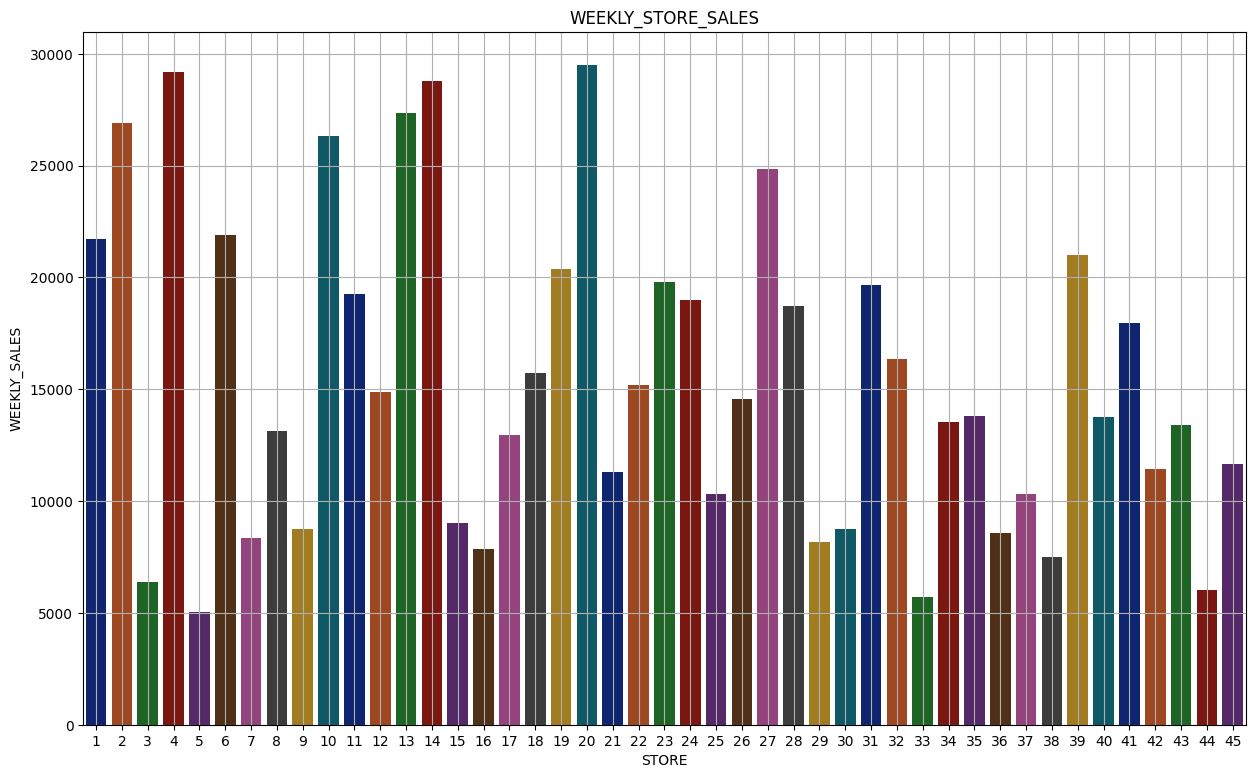

In [29]:
# BAR: "Store"

# [OR]

w = a.groupby(["Store"])["Weekly_Sales"].mean().reset_index()      # .reset_index() --> makes it to the default index, instead of "Store"(A particular data column) as the index.

# Now, lets see a other type of bar graph

w.sort_values("Weekly_Sales").style.bar(align="left")    # sorts values(not indices which we resetted by reset_index) according to "Weekly_Sales" ascending order & styled into bar graph on the left.

# If you want only "Weekly_Sales" column just do:
w.sort_values("Weekly_Sales")[["Weekly_Sales"]].style.bar(align="left")   # align= --> allignment of the given graph

# or we can just declare "Store" as index for w and do sort:

w = w.set_index("Store")         # directly setting "Store" as index instead of reset_index() indices which can make overall 2 columns
w.sort_values("Weekly_Sales").style.bar(align="left")

# [OR]

# check the shape
w.values   # it is in DataFrame
w.values.reshape(-1,)      # converted to 1 dimension (can say list/ndarray) to 

# ------------------------------------------------------------------------------------------------------------------------------------------------------

plt.figure(figsize=(15,9))
sns.barplot(x=w.index,y=w.values.reshape(-1,),palette="dark")   # got data structure error  [Must be in set_index("Store")] see above 
plt.title("WEEKLY_STORE_SALES")
plt.xlabel("STORE")
plt.ylabel("WEEKLY_SALES")
plt.grid()

# [OR]


In [30]:
# BAR: "Dept"

d = a.groupby(["Dept"])["Weekly_Sales"].mean().reset_index()
d = d.set_index("Dept")

d.sort_values("Weekly_Sales").style.bar(align="left")

# If you want both columns

d = d.reset_index()
d.sort_values("Weekly_Sales").style.bar(align="left")

,Dept,Weekly_Sales
45,47,-7.682554
41,43,1.193333
63,78,7.296638
37,39,11.123750
49,51,21.931729
43,45,23.211586
51,54,108.305985
62,77,328.961800
56,60,347.370229
80,99,415.487065


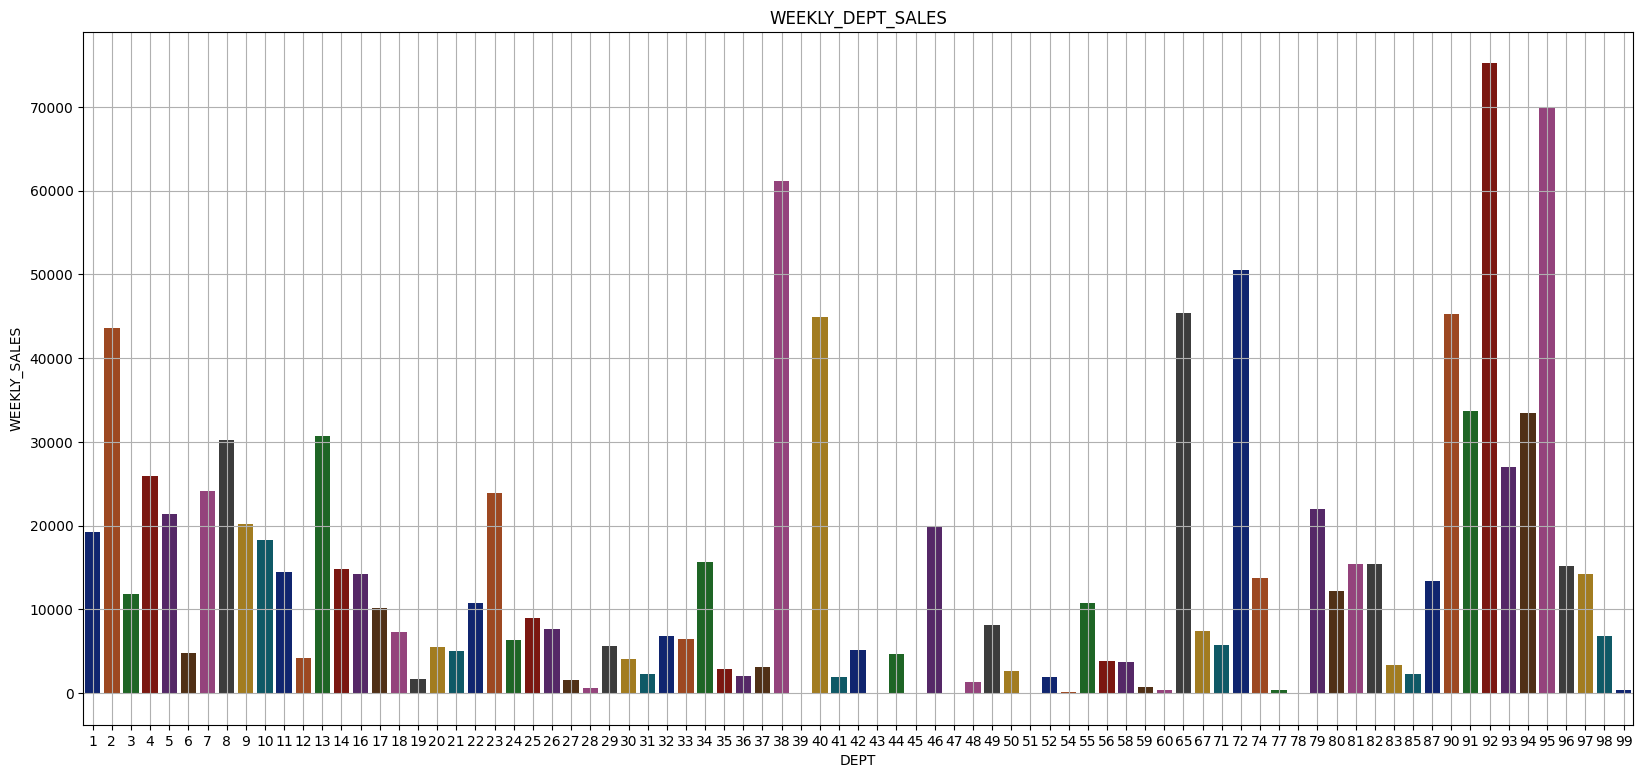

In [36]:
#[OR]

# d = d.set_index("Dept") --> set 'Dept' as index as in above we changed to default index (reset_index)

# check the shape
d.values   # it is in DataFrame
d.values.reshape(-1,)      # converted to 1 dimension (can say list/ndarray) to 

plt.figure(figsize=(20,9))
sns.barplot(x=d.index,y=d.values.reshape(-1,),palette="dark")   # got data structure error  [Must be in set_index("Dept")]
plt.title("WEEKLY_DEPT_SALES")
plt.xlabel("DEPT")
plt.ylabel("WEEKLY_SALES")
plt.grid()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         421570 non-null  int64         
 1   Dept          421570 non-null  int64         
 2   Date          421570 non-null  datetime64[ns]
 3   Weekly_Sales  421570 non-null  float64       
 4   IsHoliday     421570 non-null  bool          
 5   Type          421570 non-null  object        
 6   Size          421570 non-null  int64         
 7   Temperature   421570 non-null  float64       
 8   Fuel_Price    421570 non-null  float64       
 9   CPI           421570 non-null  float64       
 10  Unemployment  421570 non-null  float64       
 11  WEEK          421570 non-null  float64       
 12  YEAR          421570 non-null  float64       
dtypes: bool(1), datetime64[ns](1), float64(7), int64(3), object(1)
memory usage: 39.0+ MB


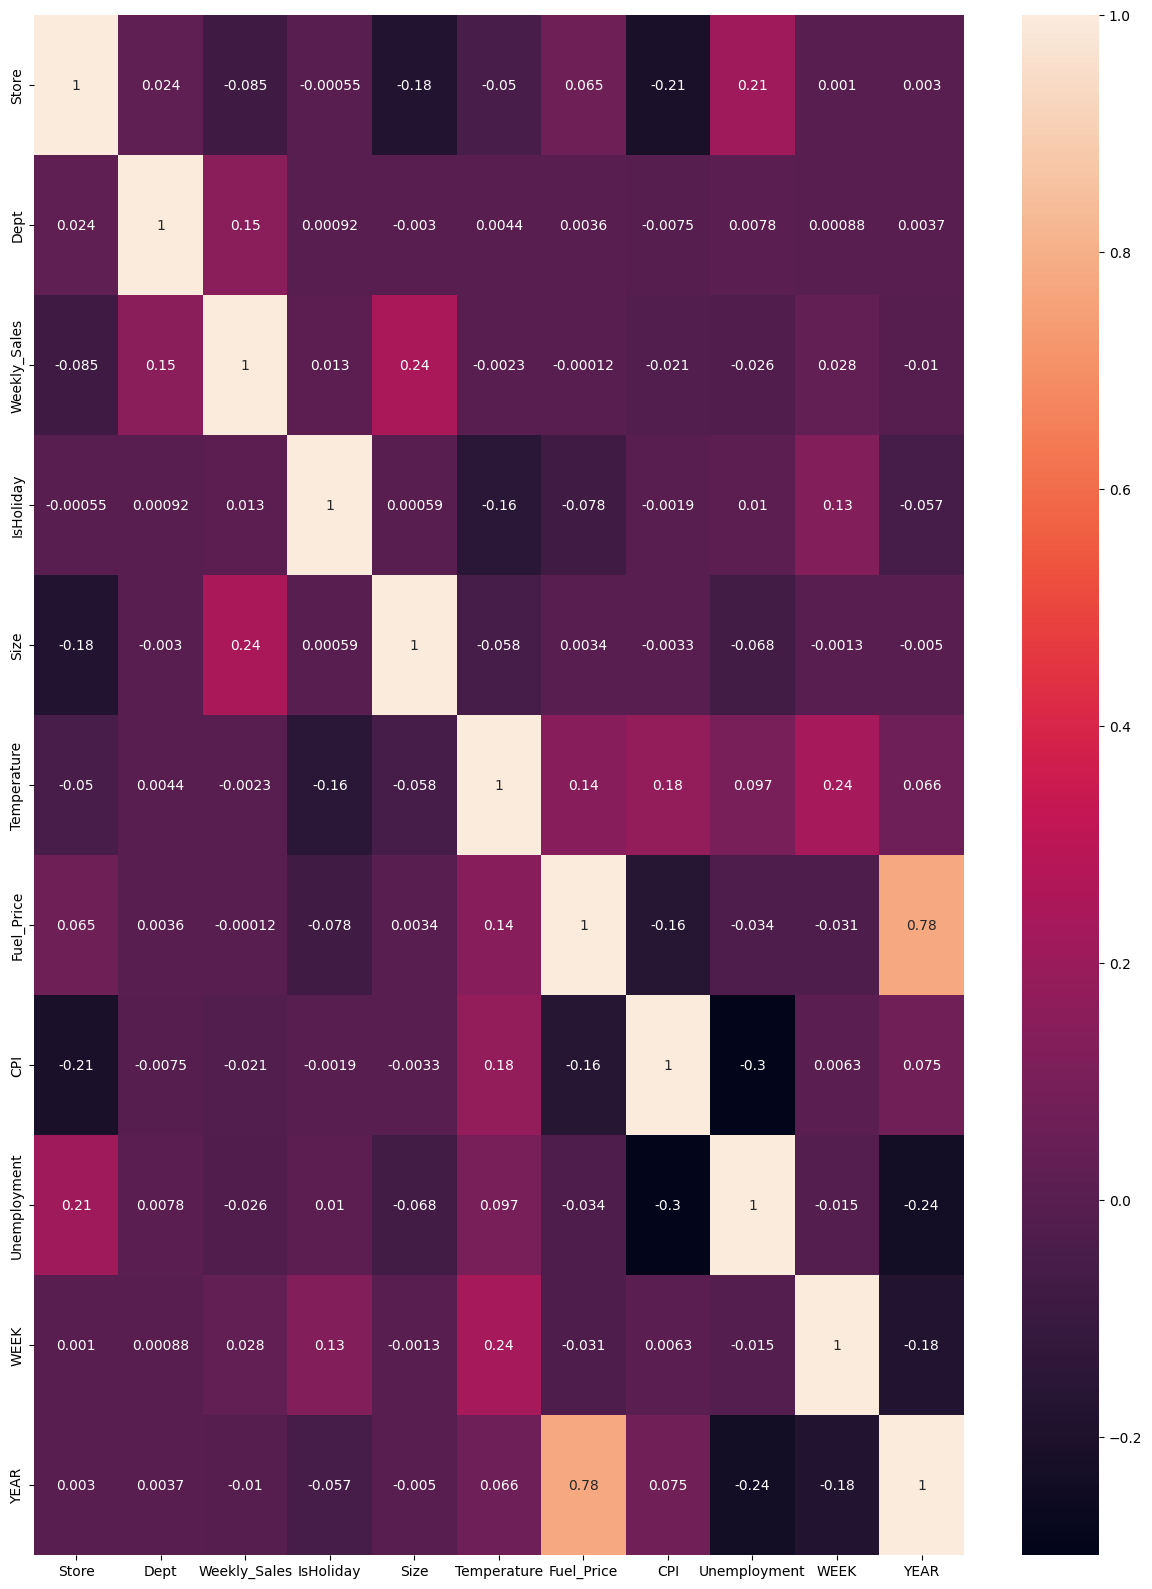

In [37]:
"""Lets see the heatmap of the data"""

plt.figure(figsize=(15,20))
sns.heatmap(a[["Store","Dept","Weekly_Sales","IsHoliday","Size","Temperature","Fuel_Price","CPI","Unemployment","WEEK","YEAR"]].corr(),annot=True)

a.info()

<Axes: xlabel='Type', ylabel='Size'>

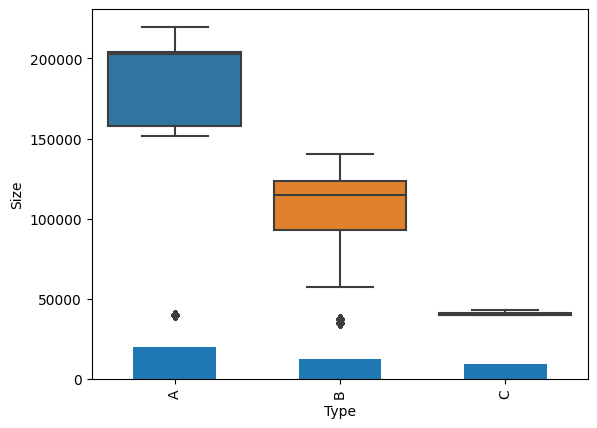

In [38]:
"""Lests see the relation between type vs size"""

a.groupby(["Type"])["Weekly_Sales"].mean().plot(kind="bar")

sns.boxplot(x=a["Type"],y=a["Size"],data=a)

<Axes: xlabel='YEAR'>

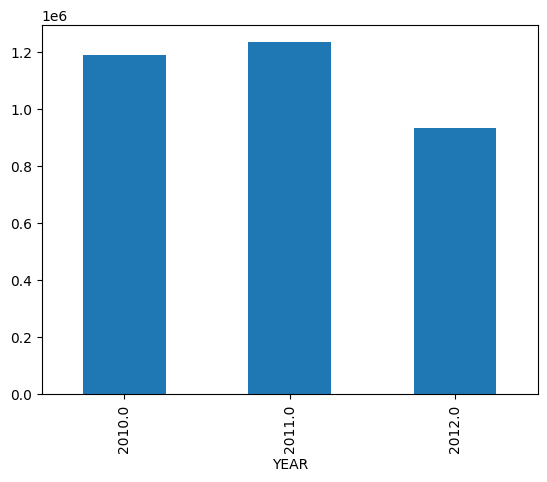

In [39]:
"""Lets see year vs unemployment"""

a.groupby(["YEAR"])["Unemployment"].sum().plot(kind="bar")

<Axes: xlabel='YEAR'>

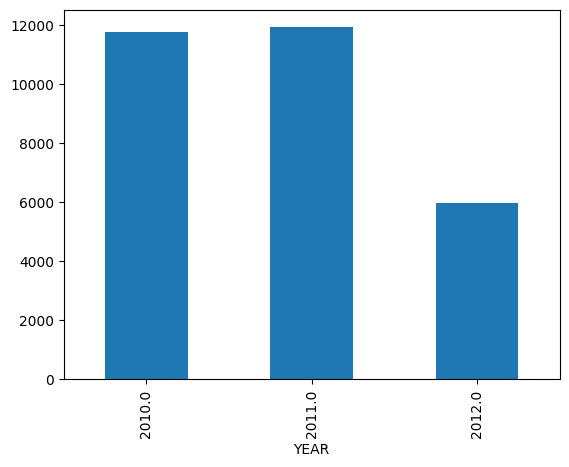

In [40]:
"""lets see year vs holidays"""


a.groupby(["YEAR"])["IsHoliday"].sum().plot(kind="bar")

In [41]:
"""lets see the temperature"""

a["Temperature"].value_counts()           # gives no. of times the temp(not repeating) are repeating

Temperature
50.43    709
67.87    646
72.62    594
76.67    583
70.28    563
        ... 
56.50     41
55.47     40
58.40     40
66.79     39
64.09     38
Name: count, Length: 3528, dtype: int64

FINALREPORT:
 1)Ddept 1 is highest unemploymen.t  2D dept 43 is lowest unemployme.n   T) type c stores are smaller in size, type a is larger in s.i   T4) type a has high avg sales, type c has low avg s.e
  S 5) store 20 has highes .s
 S  6) store 5 has lowest. s
E   7) every year sales are pretty same and end of year is unexpected.lghD    8) dept 1 has highest a.vlesH
    9) high correlation b/w year and f.e
    """